# RNN classifier

Classify IMDB reviews by their sentiment with an RNN

#### Load dependencies

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import SpatialDropout1D
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


#### Set hyperparameters

In [2]:
output_dir = 'model_output/rnn'

epochs = 16
batch_size = 128

n_dim = 64
n_unique_words = 10000
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

n_rnn = 256
drop_rnn = 0.2

# n_dense = 256
# dropout = 0.2

#### Load data

In [3]:
(x_train, y_train) , (x_valid, y_valid) = imdb.load_data(num_words = n_unique_words )

#### Preprocess data

In [4]:
x_train = pad_sequences(x_train,maxlen=max_review_length,padding=pad_type,truncating=trunc_type,value=0)
x_valid = pad_sequences(x_valid,maxlen=max_review_length,padding=pad_type,truncating=trunc_type,value=0)

#### Design NN architecture

In [6]:
model = Sequential()
model.add(Embedding(n_unique_words,n_dim,input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn,dropout=drop_rnn))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


#### Configure model

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [9]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train!

In [10]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_valid,y_valid),callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 76s 3ms/step - loss: 0.6822 - acc: 0.5488 - val_loss: 0.6742 - val_acc: 0.5609
Epoch 2/16
25000/25000 [==============================] - 74s 3ms/step - loss: 0.6739 - acc: 0.5852 - val_loss: 0.6759 - val_acc: 0.5572
Epoch 3/16
25000/25000 [==============================] - 72s 3ms/step - loss: 0.6620 - acc: 0.5994 - val_loss: 0.6685 - val_acc: 0.5742
Epoch 4/16
25000/25000 [==============================] - 70s 3ms/step - loss: 0.5994 - acc: 0.6744 - val_loss: 0.6268 - val_acc: 0.6433
Epoch 5/16
25000/25000 [==============================] - 70s 3ms/step - loss: 0.5356 - acc: 0.7300 - val_loss: 0.5838 - val_acc: 0.6989
Epoch 6/16
25000/25000 [==============================] - 70s 3ms/step - loss: 0.4843 - acc: 0.7702 - val_loss: 0.6027 - val_acc: 0.7106
Epoch 7/16
25000/25000 [==============================] - 70s 3ms/step - loss: 0.4516 - acc: 0.7922 - val_loss: 0.6067 - val_acc

#### Evaluate

In [18]:
model.load_weights(output_dir+'/weights.08.hdf5')

In [19]:
y_hat = model.predict_proba(x_valid)

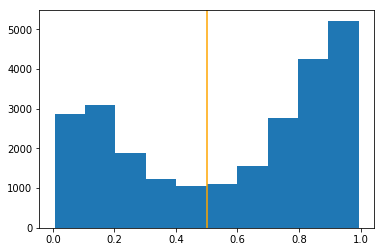

In [20]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5,color='orange')

In [21]:
pct_auc = roc_auc_score(y_valid,y_hat)*100.0

In [22]:
"{:0.2f}".format(pct_auc)

'78.09'